# <center><font color=brown>**Analysis on Mall Customer Data : Implementation ok K - Means**<font></center>

# <font color=purple>**Importing the Dependencies**</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# <font color=purple>**Importing Dataset**</font>

In [ ]:
#loading the Mall dataset from csv file to pandas dataframe
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/7. Dataset/Mall_Customers.csv")

In [ ]:
#printing the first five rows of the dataframe
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#printing the last few rows of the dataframe
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
#rename the column Genre to gender
data.rename(columns={'Genre':'Gender'},inplace=True)

In [ ]:
#Droping the column CustomerID as it not important for analysis
data.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
#total number of rows and column in the dataset
data.shape

(200, 4)

## **Observation**<br>- Dataset comprises 200 observation (rows) and 4 features (column)<br>- Out of 4, 1 is target variables and rest 3 is input variable

In [ ]:
#Columns and their corresponding datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## **Observation**<br>- The data consist of Numeric as well as Categorical value

In [ ]:
#statistics Summary
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# <font color=purple>**Handling Missing Data**</font>

In [ ]:
#checking null values in dataset
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# <font color=purple>**Visualizing Missing Values**</font>

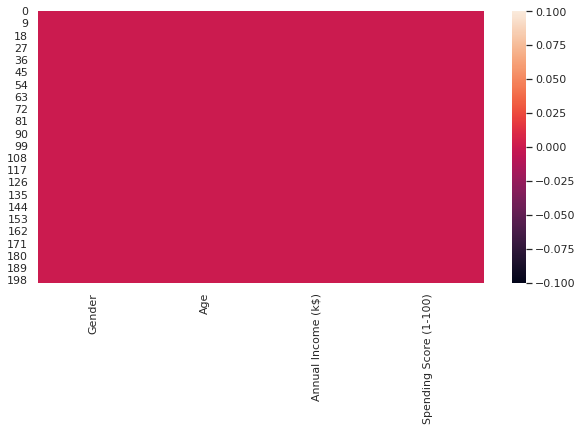

In [ ]:
#visualizing null values
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.show()

In [ ]:
#checking datatypes of each column
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## **Observation**<br>- We see all the columns of our dataset are free from null values and 3 of them are numeric column while 1 is categorical column so will encode the categorical column.

# <font color=purple>**Visualising the Data**</font>

## <font color=green>Annual Income Distribution</font>

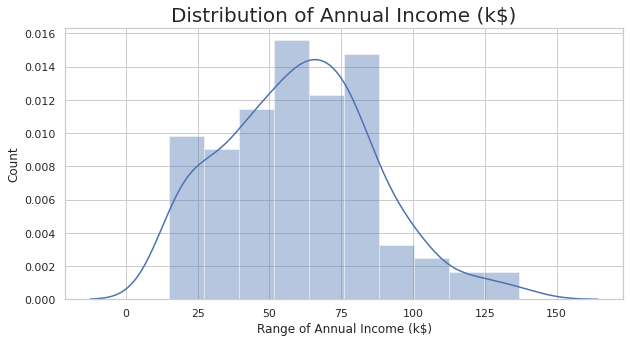

In [ ]:
#distribution of Annual Income
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

## **Observation**<br>- Most of the annual income falls between 50k to 85k.

## <font color=green>Age Distribution</font>

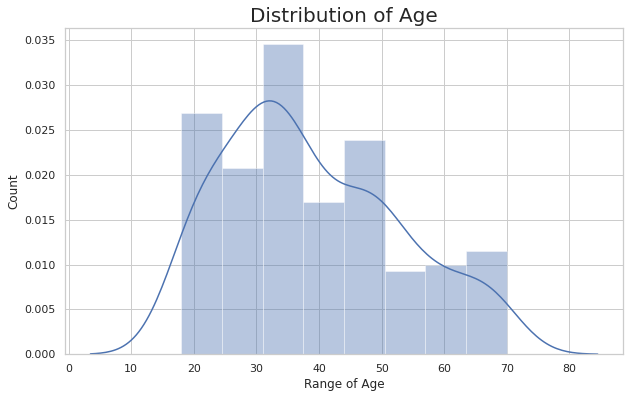

In [ ]:
#distribution of age
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age',fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

## **Observation**<br>- There are customers of wide variety of ages.

## <font color=green>Spending Score Distribution</font>

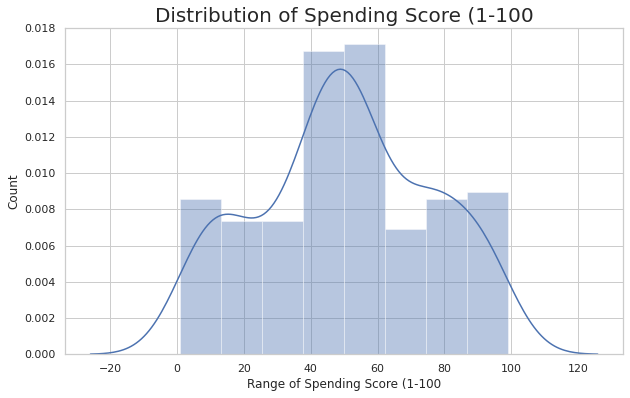

In [ ]:
#distribution of spending score
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100',fontsize=20)
plt.xlabel('Range of Spending Score (1-100')
plt.ylabel('Count')
plt.show()

## **Observation**<br>- The maximum spending score is in the range of 40 to 60.

## <font color=green>Gender Analysis</font>

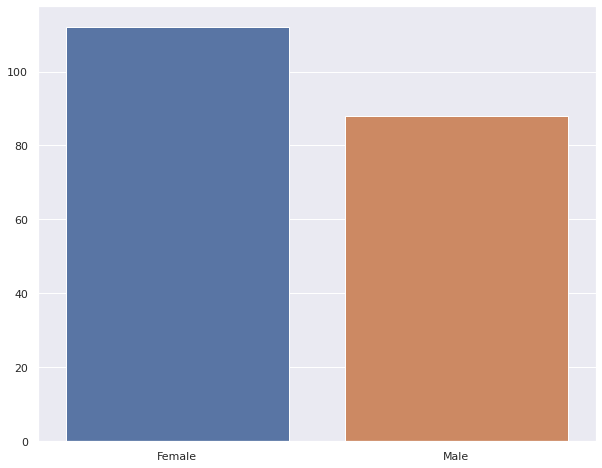

In [ ]:
genders=data.Gender.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.barplot(x=genders.index,y=genders.values)
plt.show()


## **Observation**<br>- More Female Customer than Male.

## <font color=green>Clustering Based on 2 Features - annual income and spending score. </font>

In [ ]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
#we take just the Annual Income and Spending Score.
df1=data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X=df1[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
#the input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


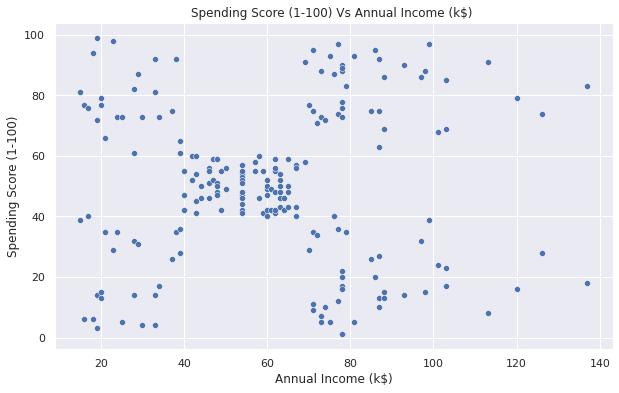

In [ ]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=X)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) Vs Annual Income (k$) ')
plt.show()

In [ ]:
#importing kmeans from sklearn
from sklearn.cluster import KMeans

In [ ]:
#calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of k.
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(X) 
  wcss.append(km.inertia_) #inertia_ inbuilt method of KMeans class which calculate the sum of squared error -  formula of SSE=sum(centerpoint-datapoint)^2

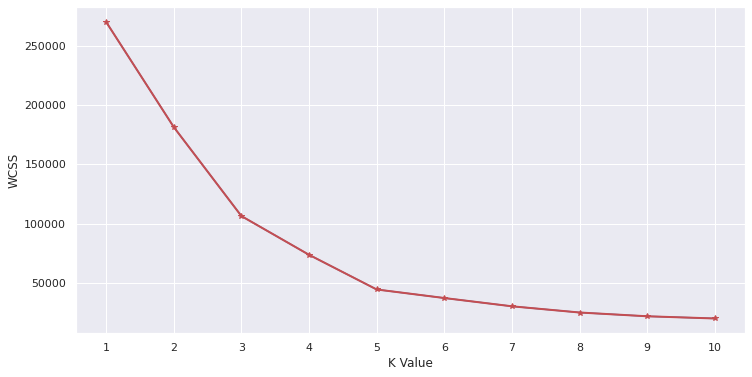

In [ ]:
#the elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11), wcss, linewidth=2, color='r', marker='*') 
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()

## **Observation**<br>- This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing.<br>- Here in the grapg, after 5 the drop is minimal, so we take 5 to be the number of clusters.

In [ ]:
#taking 5 clusters
km1=KMeans(n_clusters=5,random_state=1)
#fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1['label']=y
#the new dataframe with the clustering done
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


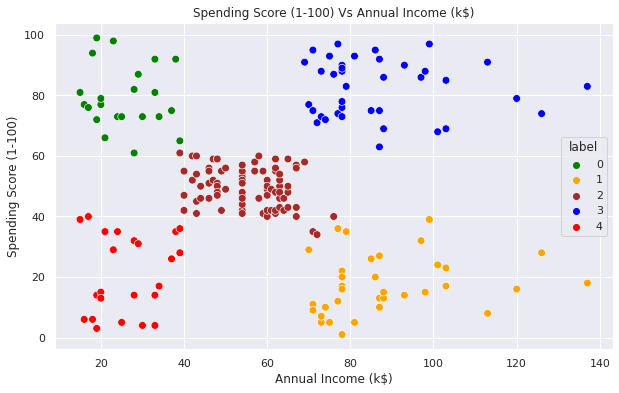

In [ ]:
#scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',
                hue='label',palette=['green','orange','brown','blue','red'],
                legend='full',data=df1,s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) Vs Annual Income (k$)')
plt.show()


## **Observation**<br>- We can clearly see that 5 different clusters have been formed from the data.<br>- The red cluster is the customers with the least income and least spending score.<br>- Similarly, the blue cluster is the customers with the most income and most spending score.